In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
#Display the data types of each column
fname = 'kc_house_data.csv'
df = pd.read_csv(fname)
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
#Drop the columns "id" and "date"
df.drop(['id','date'],axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Count the number of houses with unique floor values and convert output to a dataframe
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


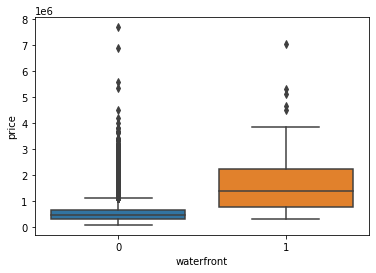

In [9]:
#Use the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers
sns.boxplot(x='waterfront',y='price',data=df)

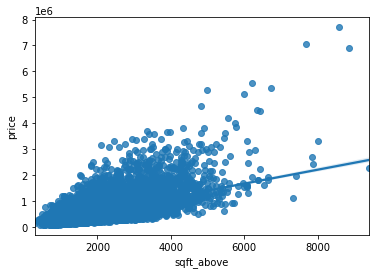

In [10]:
#Use the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price
sns.regplot(x='sqft_above',y='price',data=df)

In [11]:
from sklearn.linear_model import LinearRegression

In [14]:
#Fit a linear regression model to predict the price using the feature 'sqft_living' and calculate the R^2
lm = LinearRegression()
x = df[['sqft_living']]
y = df['price']

lm.fit(x,y)
rsq = lm.score(x,y)
print('The R^2 is', rsq)

The R^2 is 0.49285321790379316


In [18]:
df.dropna(inplace =True)

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

price
False    21611
Name: price, dtype: int64

bedrooms
False    21611
Name: bedrooms, dtype: int64

bathrooms
False    21611
Name: bathrooms, dtype: int64

sqft_living
False    21611
Name: sqft_living, dtype: int64

sqft_lot
False    21611
Name: sqft_lot, dtype: int64

floors
False    21611
Name: floors, dtype: int64

waterfront
False    21611
Name: waterfront, dtype: int64

view
False    21611
Name: view, dtype: int64

condition
False    21611
Name: condition, dtype: int64

grade
False    21611
Name: grade, dtype: int64

sqft_above
False    21611
Name: sqft_above, dtype: int64

sqft_basement
False    21611
Name: sqft_basement, dtype: int64

yr_built
False    21611
Name: yr_built, dtype: int64

yr_renovated
False    21611
Name: yr_renovated, dtype: int64

zipcode
False    21611
Name: zipcode, dtype: int64

lat
False    21611
Name: lat, dtype: int64

long
False    21611
Name: long, dtype: int64

sqft_living15
False    21611
Name: sqft_living15, dtype: int64

sqft_lot15
False    21611


In [19]:
#Fit a linear regression model to predict the price using the features 'floors','waterfront','lat',
#'bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living' and calculate the R^2
lm1 = LinearRegression()
z = df[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
lm1.fit(z,df['price'])
rsq1 = lm1.score(z,df['price'])
print('The R^2 is', rsq1)

The R^2 is 0.6577312410909922


In [21]:
#Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. 
#Fit the object using the features in the question above, then fit the model and calculate the R^2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(input)

pipe.fit(z,df['price'])
rsq2 = pipe.score(z,df['price'])
print('The R^2 is', rsq2)

The R^2 is 0.7513494174369003


In [26]:
#Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the testing data.
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

y_data=df['price']
x_data=df.drop('price',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.15,random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

pr = PolynomialFeatures(degree=2)

x_train_pr=pr.fit_transform(x_train[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

ridgemodel= Ridge(alpha=0.1)

ridgemodel.fit(x_train_pr,y_train)
rsq3 = ridgemodel.score(x_test_pr,y_test)
print('The R^2 is', rsq3)

number of test samples : 3242
number of training samples: 18369
The R^2 is 0.7455343137796894
